# Pipeline for the personalization validation (TCGA prostate data, Montagud Analysis)

In [6]:
import pandas as pd
import numpy as np 
import os
import ast
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests


from functions.validation_utils.validation_pers import pre_process_data_validation, create_pers_models_generic
from functions.analysis_utils.MaBoSS_simulation.maboss_phenotype_patient import compute_phenotype_table, compute_phenotype_mean_group_validation

from functions.analysis_utils.MaBoSS_simulation.maboss_phenotype_patient import collect_group_data
from functions.analysis_utils.stats.stats_proba import compute_kruskal_test_means


from functions.validation_utils.analysis_validation import validation_analysis


In [7]:
type_models = 'genes_models' # 'genes_models' or 'proteins_models'

folder_model_original = 'data/montagud_models'

folder_results = f'analysis/validation/{type_models}/results'
folder_validation = f'analysis/validation/{type_models}' # models

os.makedirs(folder_results, exist_ok=True)
os.makedirs(folder_validation, exist_ok=True)

### Loading the datasets

In [8]:
# Loading the data

phenotype_data = pd.read_csv('data/TCGA_data/prostate/TCGA_PRAD_phenotypes.csv')
genes_data = pd.read_csv('data/TCGA_data/prostate/TCGA_PRAD_genes_illumina.csv', sep='\t')
cnv_data = pd.read_csv('data/TCGA_data/prostate/TCGA_PRAD_cnv_gistic2.csv',sep='\t')
genes_synonyms = pd.read_csv('data/e_ensembl/genes_synonyms.csv', delimiter="\t")
uniprot_data = pd.read_csv('data/uniprot/uniprot_map.csv')
proteins_data = pd.read_csv('data/TCGA_data/prostate/TCGA_PRAD_proteins_RPPA.csv',sep='\t')

montagud_original_data_df = (
    pd.read_csv('data/montagud_models/Montagud_inter_nodes_data.csv', header=1)
    .loc[:, ['Target node', 'Interaction type', 'Source']])

nodes_montagud_synonyms = pd.read_csv('data/montagud_models/nodes_processed.csv')




tissue = 'Prostate'


# Inputs
inputs_list = ['EGF', 'FGF', 'TGFb', 'Nutrients', 'Hypoxia', 'Acidosis', 'Androgen', 'TNFalpha', 'SPOP', 'Carcinogen']


# Phenotypes
phenotype_interest = ["Proliferation","Invasion","DNA_Repair","Apoptosis"]


# size of each group of patients
size_group = 30

/var/folders/83/pqwsm5cn7vscbq8l3fnf30qr0000gn/T/ipykernel_49063/1305015724.py:14: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  nodes_montagud_synonyms = pd.read_csv('data/montagud_models/nodes_processed.csv')


### Pre-processing datasets
- Create groups based on gleason score (low, middle, high)
- Filter genes, cnv to keep only genes/ proteins of montagud nodes

In [9]:
patients_groups, patients_id,montagud_node_model,df_melted_gene,df_melted_cnv,df_melted_protein = pre_process_data_validation(
    montagud_original_data_df,
    nodes_montagud_synonyms,
    genes_data,
    cnv_data,
    size_group,
    phenotype_data,
    proteins_data,
    
)

low_groups_patients = list(patients_groups[patients_groups['Gleason_group'] == 'low_aggressive']['sampleID'])
middle_groups_patients = list(patients_groups[patients_groups['Gleason_group'] == 'middle_aggressive']['sampleID'])
high_groups_patients = list(patients_groups[patients_groups['Gleason_group'] == 'high_aggressive']['sampleID'])

 Duplicated MTOR: mTORC1 (1 rows) + mTORC2 (1 rows)
 Duplicated MYC: MYC (1 rows) + MYC_MAX (1 rows)
 Duplicated PIK3CA: PI3K (1 rows) + PIP3 (1 rows)
 Duplicated LDHA: LDHA (1 rows) + Lactic_acid (1 rows)
 Duplicated ERG: AR_ERG (1 rows) + ERG (1 rows)


In [5]:
intersection = set(low_groups_patients) & set(middle_groups_patients) & set(high_groups_patients)
print(intersection)

set()


### Create personalized Prostate models (genes/ proteins and CNV)

In [7]:
# Read the two processed data

original_model_cfg = f'{folder_model_original}/Montagud2022_Prostate_Cancer.cfg'
original_model_bnd = f'{folder_model_original}/Montagud2022_Prostate_Cancer.bnd'

os.makedirs(folder_validation, exist_ok=True)


create_pers_models_generic(
    folder_validation,
    original_model_cfg,
    original_model_bnd,
    patients_id,
    tissue,
    type_models,
    phenotype_interest,
    patients_groups,
    montagud_node_model,
    df_melted_gene,
    df_melted_cnv,
    df_melted_protein,
    amplif_factor = 100,
    context_label = tissue
    )



All .cfg and .bnd files created for the validation.
Modified and saved: analysis/validation/genes_models/low_aggressive/TCGA-QU-A6IP-01_Prostate.cfg
Modified and saved: analysis/validation/genes_models/low_aggressive/TCGA-2A-A8VL-01_Prostate.cfg
Modified and saved: analysis/validation/genes_models/low_aggressive/TCGA-V1-A8MK-01_Prostate.cfg
Modified and saved: analysis/validation/genes_models/low_aggressive/TCGA-J4-A83K-01_Prostate.cfg
Modified and saved: analysis/validation/genes_models/low_aggressive/TCGA-HC-7077-01_Prostate.cfg
Modified and saved: analysis/validation/genes_models/low_aggressive/TCGA-FC-A8O0-01_Prostate.cfg
Modified and saved: analysis/validation/genes_models/low_aggressive/TCGA-HI-7170-01_Prostate.cfg
Modified and saved: analysis/validation/genes_models/low_aggressive/TCGA-J9-A8CN-01_Prostate.cfg
Modified and saved: analysis/validation/genes_models/low_aggressive/TCGA-EJ-A65M-01_Prostate.cfg
Modified and saved: analysis/validation/genes_models/low_aggressive/TCGA-QU

### Analysis of attractors distribution

invasion never ON 
-> probably due to beta_catenin never ON -> check what gene represents beta catenin in the genes data tcga 

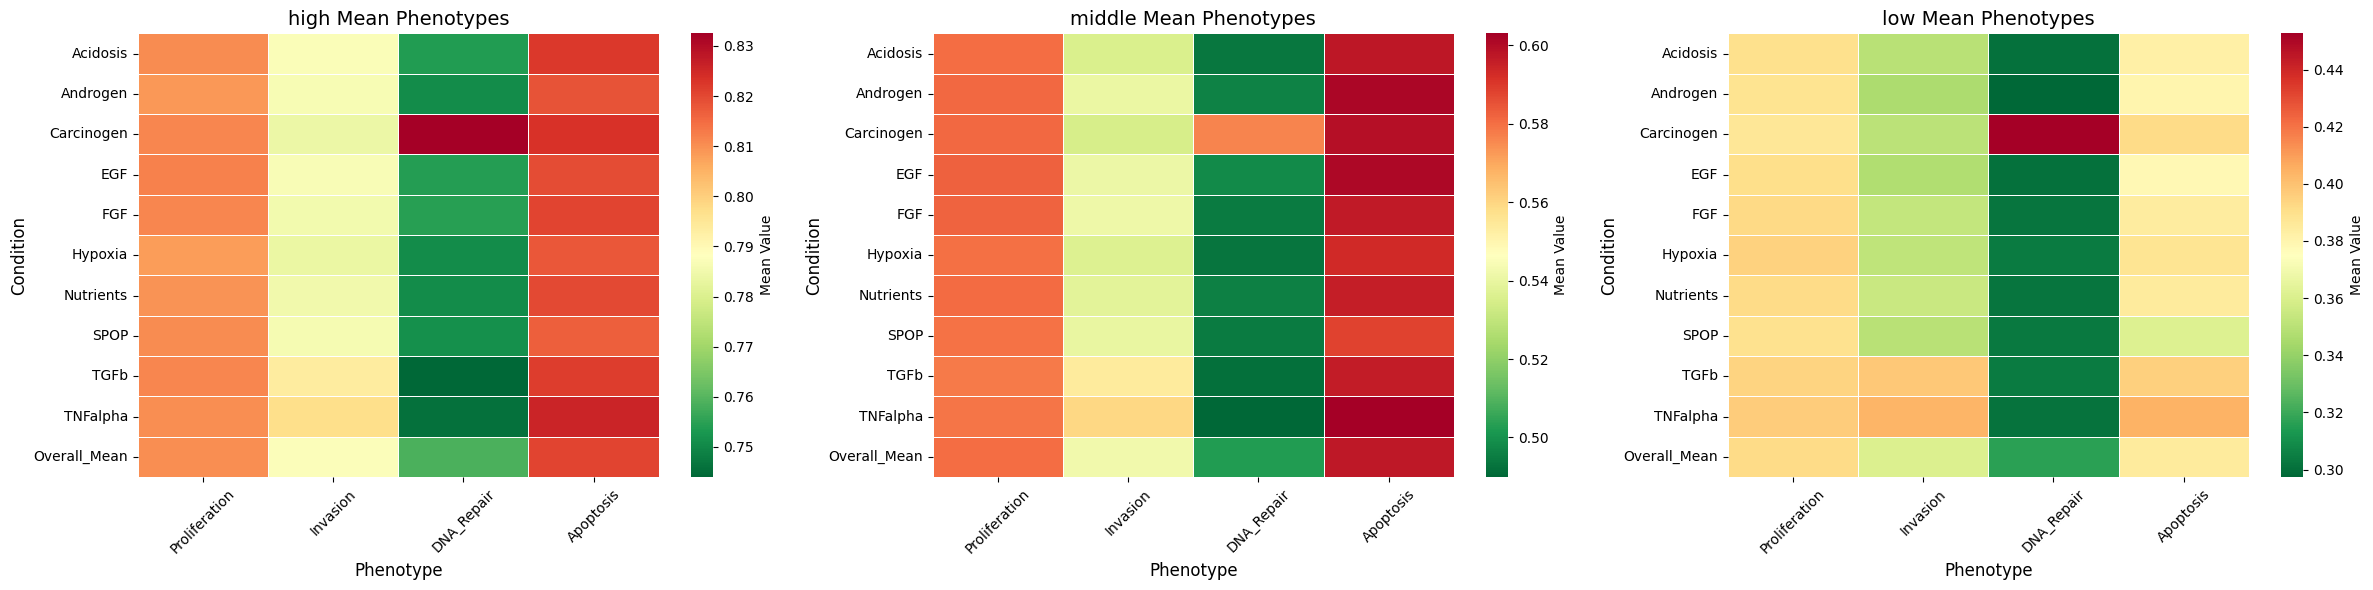

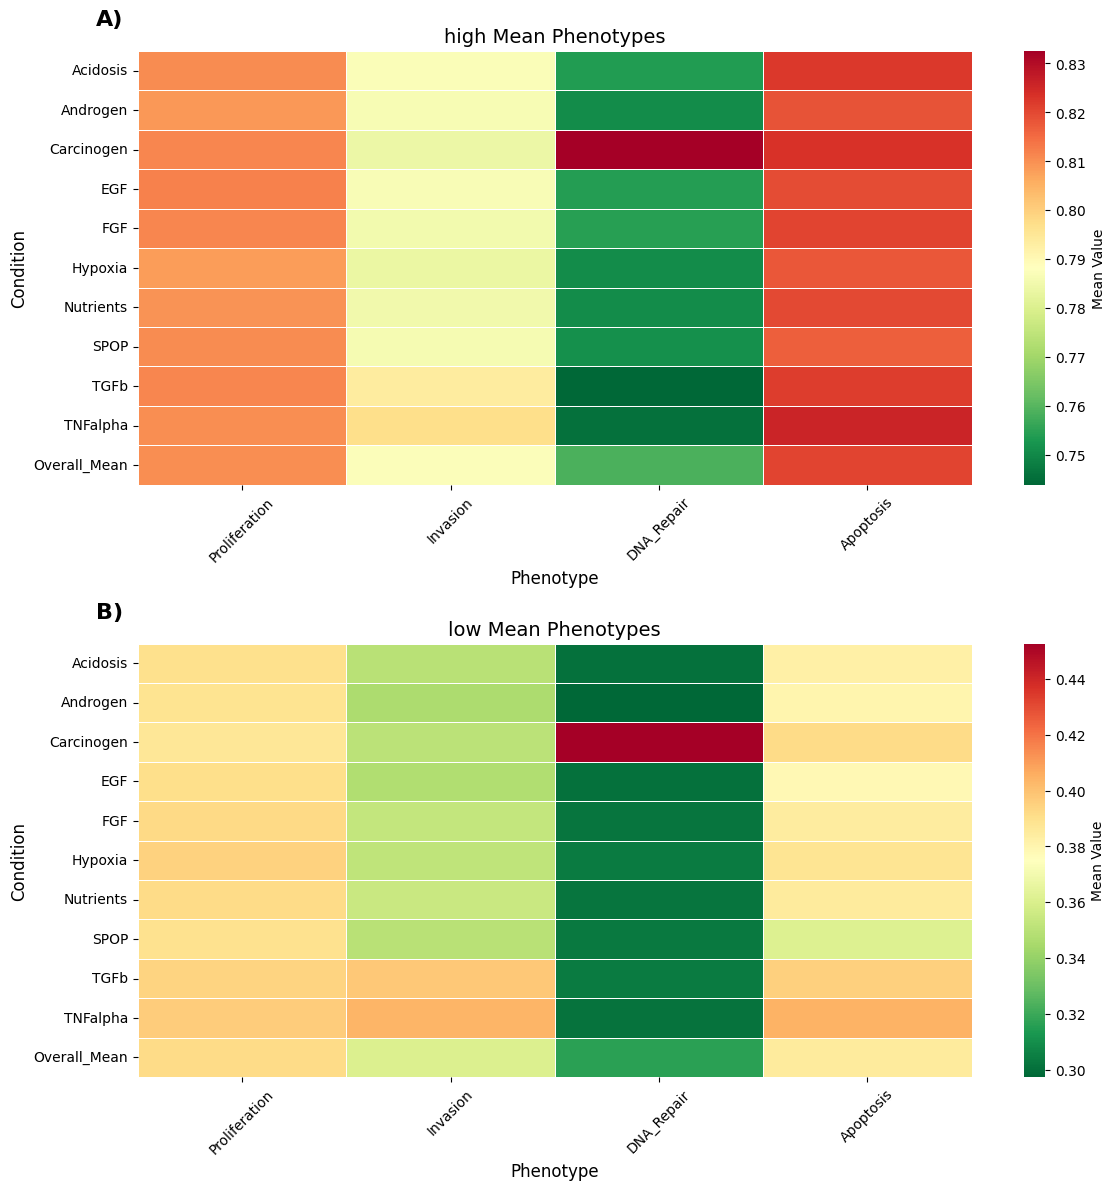

/Users/romane/repos/icr/Attractor-Resistance/functions/analysis_utils/stats/stats_proba.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(ast.literal_eval)
/Users/romane/repos/icr/Attractor-Resistance/functions/analysis_utils/stats/stats_proba.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(ast.literal_eval)
/Users/romane/repos/icr/Attractor-Resistance/functions/analysis_utils/stats/stats_proba.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(ast.literal_eval)


In [8]:

groups = ["low_aggressive", "middle_aggressive", "high_aggressive"]

adjusted_df = validation_analysis(
    folder_results,
    folder_validation,
    patients_id,
    patients_groups,
    inputs_list,
    phenotype_interest,
    groups,
    tissue,
    type_models,
    group_categories=groups
)

In [9]:
adjusted_df

(           Proliferation  Invasion DNA_Repair Apoptosis
 EGF             0.003122   0.00488   0.002978   0.00488
 FGF              0.00387   0.00488    0.00389  0.004456
 TGFb             0.00488  0.002259    0.00389  0.002259
 Nutrients        0.00488  0.005319   0.002259   0.00449
 Hypoxia          0.00488   0.00488   0.002259   0.00449
 Acidosis         0.00488   0.00488   0.002259   0.00449
 Androgen         0.00488   0.00488   0.002259   0.00449
 TNFalpha         0.00488  0.002259    0.00449  0.002259
 SPOP            0.002259   0.00488   0.003118   0.00488
 Carcinogen      0.003122  0.009115   0.003122   0.00387,
      Condition      Phenotype Adjusted_P_Value
 0          EGF  Proliferation         0.003122
 1          EGF       Invasion          0.00488
 2          EGF     DNA_Repair         0.002978
 3          EGF      Apoptosis          0.00488
 4          FGF  Proliferation          0.00387
 5          FGF       Invasion          0.00488
 6          FGF     DNA_Repair      

In [17]:
import pandas as pd
import os
from pathlib import Path

def combine_patient_results(results_folder, include_group_info=True):
    """
    Combine individual patient CSV files from subdirectories into one dataframe
    """
    all_data = []
    
    # Define the subdirectories to search
    subdirs = ['low_aggressive', 'middle_aggressive', 'high_aggressive']
    
    for subdir in subdirs:
        subdir_path = os.path.join(results_folder, subdir)
        
        # Check if subdirectory exists
        if not os.path.exists(subdir_path):
            print(f"Warning: Subdirectory {subdir_path} does not exist")
            continue
        
        # Get all CSV files in the subdirectory
        csv_files = [f for f in os.listdir(subdir_path) if f.endswith('.csv') and f.startswith('TCGA')]
        
        print(f"Found {len(csv_files)} CSV files in {subdir}")
        
        for csv_file in csv_files:
            # Extract patient ID from filename (remove .csv extension)
            patient_id = Path(csv_file).stem
            
            # Read the CSV file
            file_path = os.path.join(subdir_path, csv_file)
            df = pd.read_csv(file_path, index_col=0)
            
            # Calculate mean values across all inputs for each phenotype
            patient_data = {
                'patient_id': patient_id,
                'Proliferation': df['Proliferation'].mean(),
                'Invasion': df['Invasion'].mean(),
                'DNA_Repair': df['DNA_Repair'].mean(),
                'Apoptosis': df['Apoptosis'].mean()
            }
            
            # Add group information if requested
            if include_group_info:
                patient_data['Gleason_group'] = subdir
            
            all_data.append(patient_data)
    
    # Create combined dataframe
    if not all_data:
        print("No data found in any subdirectory")
        return pd.DataFrame()
    
    combined_df = pd.DataFrame(all_data)
    combined_df.set_index('patient_id', inplace=True)
    
    print(f"Combined data from {len(all_data)} patients")
    return combined_df

# Use the updated function
results_folder = 'analysis/validation_prostate_tcga/genes_models/results'
combined_results = combine_patient_results(results_folder, include_group_info=True)

Found 30 CSV files in low_aggressive
Found 30 CSV files in middle_aggressive
Found 30 CSV files in high_aggressive
Combined data from 90 patients


In [19]:

combined_results['Group_Proliferation'] = np.where(
    combined_results['Proliferation'] < combined_results['Proliferation'].mean(), 
    'low', 
    'high'
)

# You can also create groups for Apoptosis
combined_results['Group_Apoptosis'] = np.where(
    combined_results['Apoptosis'] < combined_results['Apoptosis'].mean(), 
    'low', 
    'high'
)




,Proliferation,Invasion,DNA_Repair,Apoptosis,Gleason_group,Group_Proliferation,Group_Apoptosis
patient_id,,,,,,,
TCGA-CH-5738-01,0.201406,0.305429,0.322228,0.430632,low_aggressive,low,low
TCGA-G9-6342-01,0.017000,0.005800,0.003800,0.025054,low_aggressive,low,low
TCGA-XJ-A9DQ-01,0.012492,0.009052,0.001600,0.030976,low_aggressive,low,low
TCGA-HC-7077-01,0.996800,0.994800,0.960142,0.994400,low_aggressive,high,high
TCGA-G9-7509-01,0.996600,0.994629,0.962121,0.994381,low_aggressive,high,high
...,...,...,...,...,...,...,...
TCGA-ZG-A9M4-01,0.999600,0.997800,0.977542,0.997384,high_aggressive,high,high
TCGA-ZG-A9L6-01,0.997895,0.997926,0.978977,0.995322,high_aggressive,high,high
TCGA-HC-8262-01,0.020255,0.009628,0.003906,0.032089,high_aggressive,low,low


In [23]:
combined_results = combined_results.reset_index()
combined_results

,patient_id,Proliferation,Invasion,DNA_Repair,Apoptosis,Gleason_group,Group_Proliferation,Group_Apoptosis
0,TCGA-CH-5738-01,0.201406,0.305429,0.322228,0.430632,low_aggressive,low,low
1,TCGA-G9-6342-01,0.017000,0.005800,0.003800,0.025054,low_aggressive,low,low
2,TCGA-XJ-A9DQ-01,0.012492,0.009052,0.001600,0.030976,low_aggressive,low,low
3,TCGA-HC-7077-01,0.996800,0.994800,0.960142,0.994400,low_aggressive,high,high
4,TCGA-G9-7509-01,0.996600,0.994629,0.962121,0.994381,low_aggressive,high,high
...,...,...,...,...,...,...,...,...
85,TCGA-ZG-A9M4-01,0.999600,0.997800,0.977542,0.997384,high_aggressive,high,high
86,TCGA-ZG-A9L6-01,0.997895,0.997926,0.978977,0.995322,high_aggressive,high,high
87,TCGA-HC-8262-01,0.020255,0.009628,0.003906,0.032089,high_aggressive,low,low
88,TCGA-EJ-A46E-01,0.450694,0.210882,0.086400,0.639291,high_aggressive,low,high


## Survival Analysis

In [4]:
survival_data = pd.read_csv('data/TCGA_data/survival_PRAD_survival.txt', sep='\t')

In [22]:

patients_ids = set(low_groups_patients) | set(middle_groups_patients) | set(high_groups_patients)


In [21]:
survival_data = survival_data[survival_data['sample'].isin(patients_ids)]
survival_data = survival_data[['OS', 'OS.time', 'sample']]
survival_data

,OS,OS.time,sample
0,0,621,TCGA-2A-A8VL-01
1,0,1701,TCGA-2A-A8VO-01
8,0,1272,TCGA-2A-AAYO-01
9,0,615,TCGA-2A-AAYU-01
12,0,212,TCGA-CH-5738-01
...,...,...,...
542,0,94,TCGA-ZG-A8QW-01
544,0,404,TCGA-ZG-A8QY-01
552,0,687,TCGA-ZG-A9L6-01
555,0,378,TCGA-ZG-A9LM-01


In [25]:
survival_analysis_data = survival_data.merge(
    combined_results, 
    left_on='sample', 
    right_on='patient_id', 
    how='inner'
)



Group 'low': 42 patients
Group 'high': 48 patients

Log-rank test:
Test statistic: 0.0039
p-value: 0.9499
Significant difference (α=0.05): False

Plot saved to: analysis/validation_prostate_tcga/genes_models/results/output/cnv_discrete_genes_continuous/survival_analysis_group-proliferation.png


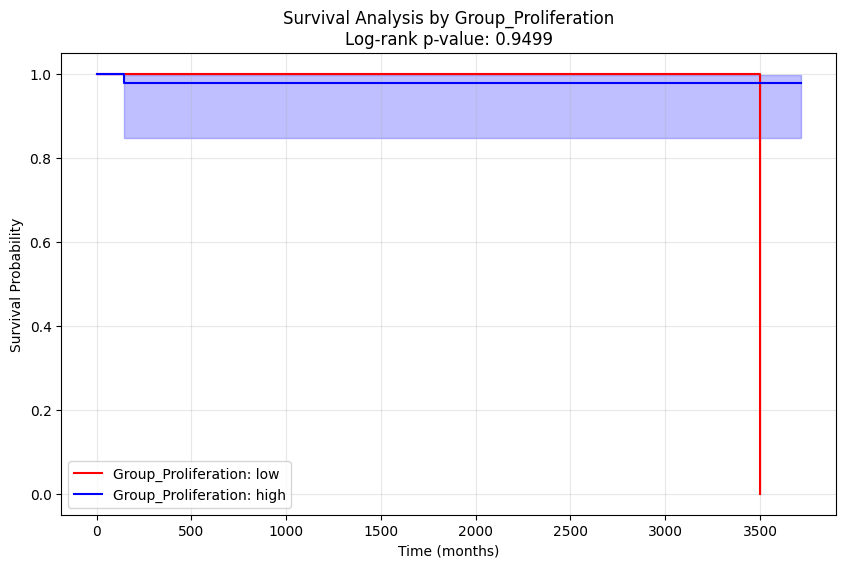

Group 'low': 40 patients
Group 'high': 50 patients

Log-rank test:
Test statistic: 0.0098
p-value: 0.9212
Significant difference (α=0.05): False

Plot saved to: analysis/validation_prostate_tcga/genes_models/results/output/cnv_discrete_genes_continuous/survival_analysis_group-apoptosis.png


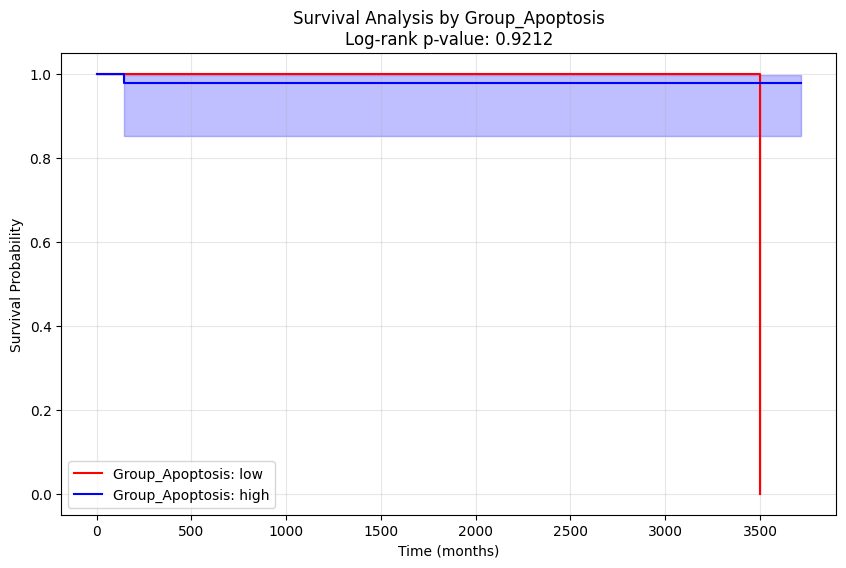

In [27]:
def survival_analysis_comparison(data, group_col, time_col='OS.time', event_col='OS', pers_technique=None, save_plots=True):
    """
    Perform complete survival analysis comparison between groups
    """
    from lifelines.statistics import logrank_test
    from lifelines import KaplanMeierFitter
    import matplotlib.pyplot as plt
    import os
    
    # Get unique groups
    groups = data[group_col].unique()
    
    if len(groups) != 2:
        print(f"Warning: Expected 2 groups, found {len(groups)}")
        return None
    
    # Separate groups
    group1_data = data[data[group_col] == groups[0]]
    group2_data = data[data[group_col] == groups[1]]
    
    print(f"Group '{groups[0]}': {len(group1_data)} patients")
    print(f"Group '{groups[1]}': {len(group2_data)} patients")
    
    # Log-rank test
    results = logrank_test(
        group1_data[time_col], 
        group2_data[time_col],
        group1_data[event_col], 
        group2_data[event_col]
    )
    
    print(f"\nLog-rank test:")
    print(f"Test statistic: {results.test_statistic:.4f}")
    print(f"p-value: {results.p_value:.4f}")
    print(f"Significant difference (α=0.05): {results.p_value < 0.05}")
    
    # Plot Kaplan-Meier curves
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(10, 6))
    
    # Plot each group
    colors = ['red', 'blue']
    for i, group in enumerate(groups):
        group_data = data[data[group_col] == group]
        kmf.fit(group_data[time_col], group_data[event_col], label=f'{group_col}: {group}')
        kmf.plot_survival_function(color=colors[i])
    
    plt.title(f'Survival Analysis by {group_col}\nLog-rank p-value: {results.p_value:.4f}')
    plt.xlabel('Time (months)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Save plot if requested
    if save_plots:
        # Create output directory
        if pers_technique:
            output_dir = f"analysis/validation_prostate_tcga/genes_models/results/output/{pers_technique}"
        else:
            output_dir = 'analysis/validation_prostate_tcga/genes_models/results/output'
        
        os.makedirs(output_dir, exist_ok=True)
        
        # Create filename
        filename = f"survival_analysis_{group_col.lower().replace('_', '-')}.png"
        filepath = os.path.join(output_dir, filename)
        
        # Save the plot
        plt.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"\nPlot saved to: {filepath}")
    
    plt.show()
    
    return results

# Use the updated function
results = survival_analysis_comparison(
    survival_analysis_data, 
    'Group_Proliferation', 
    pers_technique='cnv_discrete_genes_continuous',
    save_plots=True
)

results = survival_analysis_comparison(
    survival_analysis_data, 
    'Group_Apoptosis',
    pers_technique='cnv_discrete_genes_continuous',
    save_plots=True
)

they might be all alive -> maybe try to select patients id also dead? 